## Import Libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Load Dataset

In [43]:
# Load CSV File
df = pd.read_csv('StudentPerformanceFactors.csv')
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [44]:
# summary for dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [99]:
# New Feature
df['Hours_Attendance'] = df['Hours_Studied'] * df['Attendance']

# Some Visualizations

## Distribution of Exam Sacores

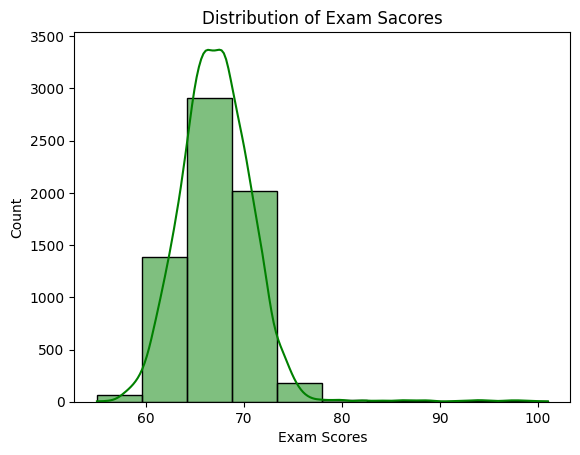

In [45]:
sns.histplot(df['Exam_Score'], bins=10, kde= True, color='green')
plt.title("Distribution of Exam Sacores")
plt.xlabel("Exam Scores")
plt.ylabel("Count")
plt.show()

## Hours Studied Vs Exam Scores

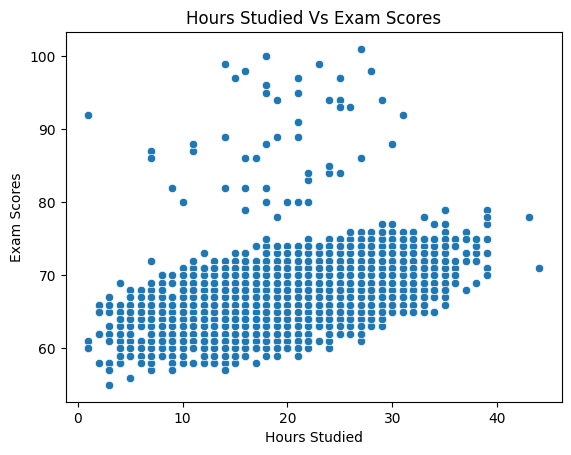

In [46]:
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title("Hours Studied Vs Exam Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Scores")
plt.show()

## Correlation Heatmap

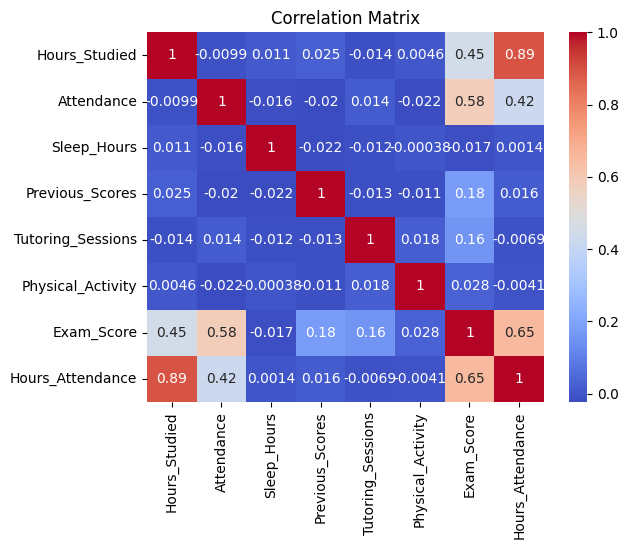

In [100]:
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
corr = numerical_cols.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Data Cleaning

In [101]:
# Check for missing values
print(df.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
Hours_Attendance               0
dtype: int64


In [102]:
x = df[['Hours_Studied', 'Attendance','Hours_Attendance']]
y= df['Exam_Score']

## Train Test Split Data

In [103]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [104]:
# Dimensions
print(f"Training Features Shape : {x_train.shape}")
print(f"Test Features Shape : {x_test.shape}")
print(f"Training Target Shape : {y_train.shape}")
print(f"Test Target Shape : {y_test.shape}")

Training Features Shape : (5285, 3)
Test Features Shape : (1322, 3)
Training Target Shape : (5285,)
Test Target Shape : (1322,)


In [105]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [106]:
x_test

,Hours_Studied,Attendance,Hours_Attendance
743,20,71,1420
5551,22,71,1562
3442,21,91,1911
6571,12,91,1092
4204,21,63,1323
...,...,...,...
4709,20,78,1560
3664,27,90,2430
5231,23,72,1656
1773,21,76,1596


In [107]:
y_test

743     65
5551    65
3442    71
6571    64
4204    66
        ..
4709    69
3664    72
5231    66
1773    63
5782    72
Name: Exam_Score, Length: 1322, dtype: int64

In [108]:
predicitions = model.predict(x_test)
predicitions

array([65.46337781, 66.02697961, 69.73227259, ..., 66.50976643,
       66.74195218, 69.52455524])

In [115]:
test = [[21,91,1911]]
print(f"Predictions : {model.predict(test)}")

Predictions : [69.73227259]


C:\Users\bisho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Plot Actual Vs predicted 

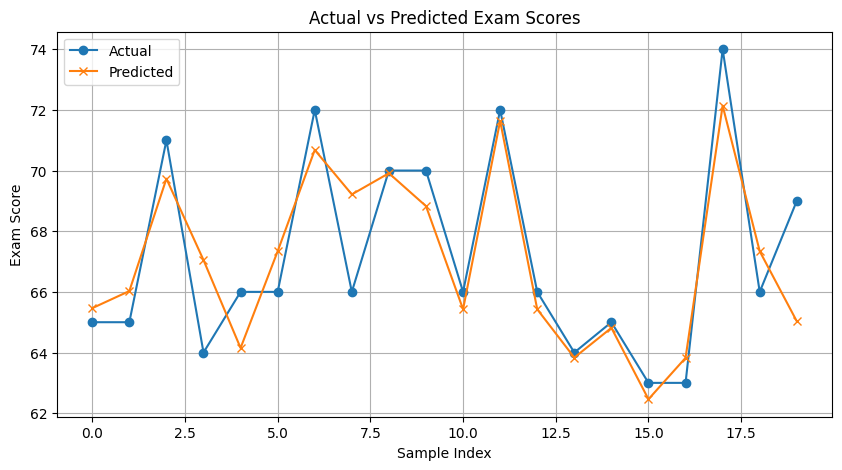

In [110]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:20], label='Actual', marker='o')
plt.plot(predicitions[:20], label='Predicted', marker='x')
plt.title("Actual vs Predicted Exam Scores")
plt.xlabel("Sample Index")
plt.ylabel("Exam Score")
plt.legend()
plt.grid(True)
plt.show()


## Scatter Plot: Actual vs Predicted


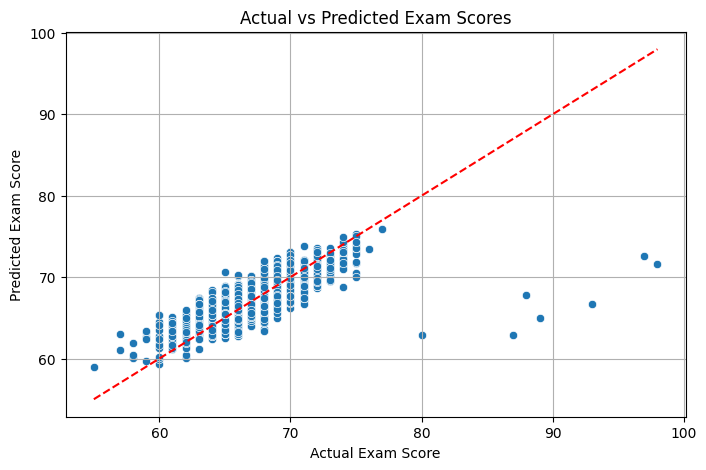

In [111]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=predicitions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Ideal line
plt.title("Actual vs Predicted Exam Scores")
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.grid(True)
plt.show()


## Model Performance Metrics

In [112]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, predicitions)
mse = mean_squared_error(y_test, predicitions)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Absolute Error (MAE): 1.47
Mean Squared Error (MSE): 5.80


## Bonus Things

## 1. Polynomial Regression Test

In [116]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear', LinearRegression())
])

poly_model.fit(x_train, y_train)
poly_preds = poly_model.predict(x_test)

mae_poly = mean_absolute_error(y_test, poly_preds)
mse_poly = mean_squared_error(y_test, poly_preds)

print(f"Polynomial Regression MAE: {mae_poly:.2f}")
print(f"Polynomial Regression MSE: {mse_poly:.2f}")


Polynomial Regression MAE: 1.47
Polynomial Regression MSE: 5.82


## 2. Feature Combination Experiments

In [118]:
feature_sets = [
    ['Hours_Studied', 'Attendance', 'Hours_Attendance'],
    ['Hours_Studied', 'Attendance', 'Sleep_Hours'],
    ['Hours_Studied', 'Attendance', 'Sleep_Hours']
]

for features in feature_sets:
    X = df[features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    print(f"Features: {features} | MAE: {mae:.2f} | MSE: {mse:.2f}")


Features: ['Hours_Studied', 'Attendance', 'Hours_Attendance'] | MAE: 1.47 | MSE: 5.80
Features: ['Hours_Studied', 'Attendance', 'Sleep_Hours'] | MAE: 1.47 | MSE: 5.82
Features: ['Hours_Studied', 'Attendance', 'Sleep_Hours'] | MAE: 1.47 | MSE: 5.82
